In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc
import os
import scipy.stats as stats
import pandas as pd
import plotly.express as px
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

## ```Cyclists``` Dataset

The dataset is used after it has undergone the phases of cleaning, feature engineering, and outlier detection.

In [2]:
cyclists_df = pd.read_csv('../dataset/cyclists_outlier.csv')

All columns present after cleaning, feature engineering, and outlier detection 

In [3]:
print(cyclists_df.columns)

Index(['_url', 'name', 'birth_year', 'nationality', 'cyclist_experience',
       'cyclist_win', 'cyclist_win_ratio', 'avg_relative_position',
       'relative_position_std', 'min_relative_position',
       'avg_performance_vs_startlist', 'performance_entropy',
       'weighted_podiums', 'career_level', 'avg_position', 'cyclist_x',
       'best_position', 'cyclist_y', 'best_position_std', 'top_experience',
       'continent', 'top_cyclists'],
      dtype='object')


Only numerical features are kept for k-means

In [4]:
numeric_columns = cyclists_df.select_dtypes(include=[np.number]).columns
print(numeric_columns)

Index(['birth_year', 'cyclist_experience', 'cyclist_win', 'cyclist_win_ratio',
       'avg_relative_position', 'relative_position_std',
       'min_relative_position', 'avg_performance_vs_startlist',
       'performance_entropy', 'weighted_podiums', 'career_level',
       'avg_position', 'best_position', 'best_position_std'],
      dtype='object')


### **Clustering Preprocessing - Normalization**

#### **Decision of cyclists' features**
Feature decision is made among the numerical-only features 

In [5]:
# Specify the columns to keep
columns_to_keep = ["avg_relative_position", "career_level", "relative_position_std"] 
# new dataset with only the specified columns
all_cyclists_df = cyclists_df
cyclists_df = cyclists_df[columns_to_keep]

#### **Features normalization**


Standardize cyclists_df by scaling each feature to have a mean of 0 and a standard deviation of 1.

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(cyclists_df)
cyclist_normalized_df = scaler.transform(cyclists_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(cyclists_df)), columns=cyclists_df.columns)



,avg_relative_position,career_level,relative_position_std
0,0.456286,0.899462,0.243635
1,0.630686,-0.572894,0.205735
2,0.557360,-0.123706,0.219011
3,0.464642,-0.502688,0.238795
4,0.589817,-0.152291,0.238517
...,...,...,...
4140,0.510309,-0.496200,0.340690
4141,0.637519,-0.593160,0.215697
4142,0.697735,-0.600964,0.150866
4143,0.413682,-0.303189,0.238513


### **K-menas** of cyclists dataset 

#### **Best k**

In [7]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(cyclists_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels
    
    print(f'for k = {k}')
    print('SSE %s' % sse)
    # Use a smaller sample for Davies-Bouldin score calculation to avoid memory error
    sample_size = min(1000, len(cyclists_df))
    sample_indices = np.random.choice(len(cyclists_df), sample_size, replace=False)
    sample_df = cyclists_df.iloc[sample_indices]
    sample_labels = labels[sample_indices]
    current_bouldin = metrics.davies_bouldin_score(sample_df, sample_labels)
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    current_silhouette = silhouette_score(cyclists_df, labels)
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)
    

for k = 2
SSE 991.4362571070367
Separation 0.49504139472560565
Silhouette 0.7509816202093502
for k = 3
SSE 463.373907457227
Separation 0.4884219078940785
Silhouette 0.6911080567099275
for k = 4
SSE 282.1435307608838
Separation 0.5291687571784622
Silhouette 0.6259500338309915
for k = 5
SSE 197.80728449197613
Separation 0.5824028915074615
Silhouette 0.5516901678000709
for k = 6
SSE 150.64802549074443
Separation 0.5787495624225324
Silhouette 0.5109061352476244
for k = 7
SSE 120.1310778199647
Separation 0.5883852747951226
Silhouette 0.49775780316090423
for k = 8
SSE 99.43247807281354
Separation 0.6880097846085487
Silhouette 0.40569994736011356
for k = 9
SSE 84.74860074178585
Separation 0.7014209349630708
Silhouette 0.38423473972322225
for k = 10
SSE 74.12618799953975
Separation 0.7097435227360974
Silhouette 0.37957264955664843
for k = 15
SSE 48.29886710214442
Separation 0.768089102596104
Silhouette 0.34080748623583695
for k = 20
SSE 36.76859010891803
Separation 0.8773898153174808
Silhouett

**SSE plot**

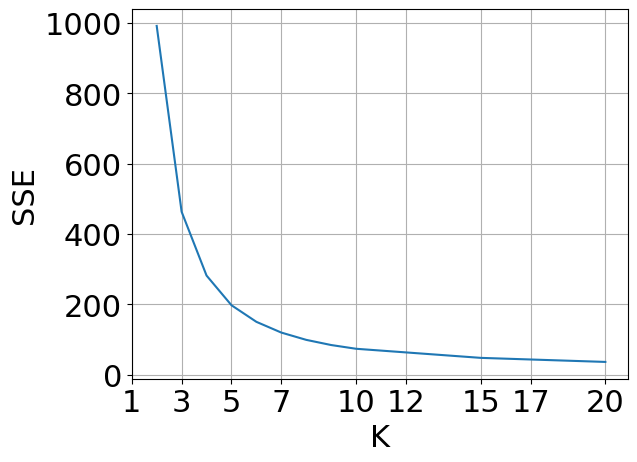

In [8]:
sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()


For K=3, appears to be the first point at which the rate of decrease in the curve decreases

**Silhouette plot**

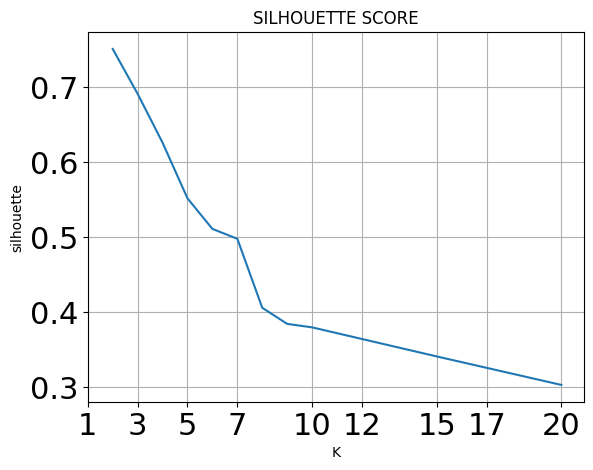

In [9]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

Silhouette reaches a maximum value near to k=3

**Dvies-Bouldin plot**

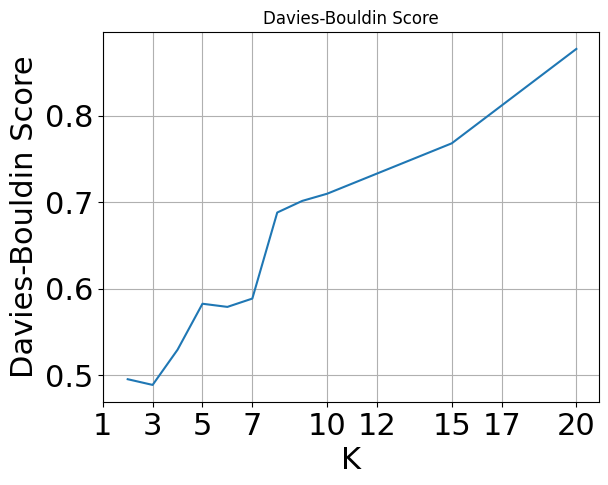

In [10]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

In this case the best value is with k=3 

**Best k conclusion:**<br>
Considering the three metrics, the value of K=3 emerges as the best choice, as it represents a compromise that aligns well with all the evaluated metrics. 

#### **K-means resuslts** (cyclists dataset)


Considering the three metrics, the value of K=3 emerges as the best choice, as it represents a compromise that aligns well with all the evaluated metrics.

In [11]:
#RETRAIN BEST K-MEANS
best_k = 3
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=1000)
best_kmeans.fit(cyclist_normalized_df)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [12]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [1389, 2178, 578]


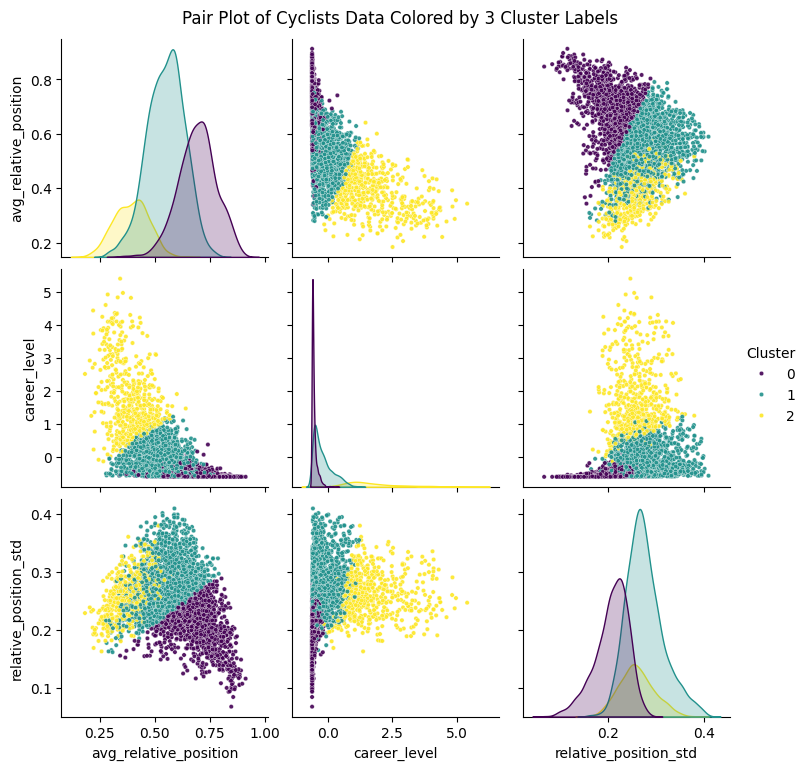

In [13]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

all_cyclists_df = all_cyclists_df.assign(Cluster=labels_series.values)

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(cyclists_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10, 'alpha': 0.9})
plt.suptitle(f'Pair Plot of Cyclists Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()



Based on the pair plot the culstering result better is chosen 

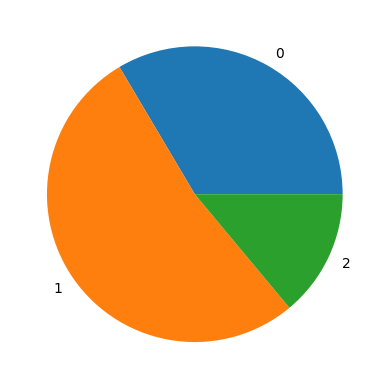

In [14]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

#### Characterization based on top cyclists column

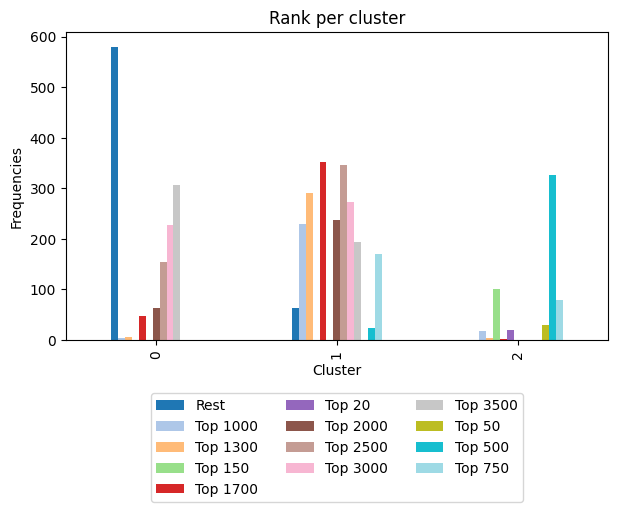

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, all_cyclists_df['top_cyclists'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


This plot shows, for each cluster, the number of cyclists belonging to that cluster who have a specific value for the feature "top_cyclist." This feature was created based on the "career_level" score: cyclists were ranked according to this score, and then different classes were created based on their position, such as top_20, top_50, and so on. <br>
The plot thus demonstrates that the clustering has grouped cyclists based on their career level, essentially reflecting how "strong" they were during their careers. By observing the different frequencies across clusters, it is evident that cluster 2 corresponds to the top cyclists, cluster 1 to intermediate-level cyclists, and cluster 0 to the remaining ones

**More precise visualization**

Starting from the plot shown above, the same analysis is now performed but with class divisions corresponding to the clustering results. The first class (representing the strongest cyclists) includes the top 578 cyclists, as the cluster identified as containing the best cyclists consists of 578 individuals, who ideally align with this category. The second class includes cyclists ranked from position 578 to 2756 (the next 2178 cyclists following the first category). Finally, the remaining cyclists, from position 2756 onward, form the third class

In [16]:
# Sort the cyclists_df DataFrame by the 'career_level' column in descending order
sorted_cyclists_df = all_cyclists_df.sort_values(by='career_level', ascending=False)
[1389, 2178, 578]
# Define the bins and labels
bins = [0, 578, 2756, len(sorted_cyclists_df)]
labels = ['Top 578', 'Top 2756', 'Rest']

# Create a new column 'career_level_category' based on the bins
sorted_cyclists_df['top_cyclists2'] = pd.cut(range(1, len(sorted_cyclists_df) + 1), bins=bins, labels=labels, right=False)

# Add the 'top_cyclists' column to the original cyclists_df
all_cyclists_df = all_cyclists_df.merge(sorted_cyclists_df[['_url', 'top_cyclists2']], on='_url', how='left')

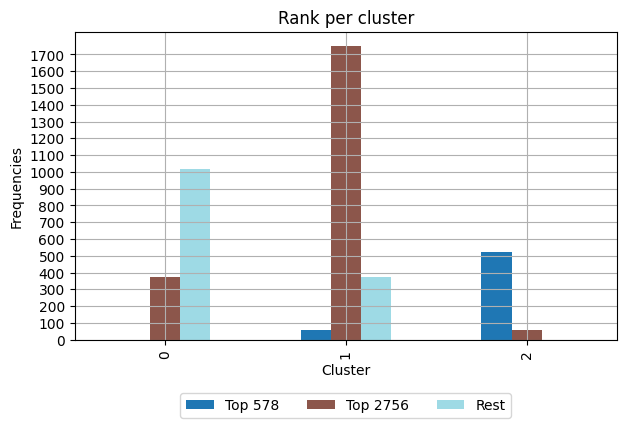

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, all_cyclists_df['top_cyclists2'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Aggiungere più intervalli sull'asse y
ax.set_yticks(range(0, rank_xt_pct.values.max() + 1, 100))

# Aggiungere la griglia
ax.grid(True)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


Ideally, we would expect to see a single blue bar for cluster 2, a single brown bar for cluster 1, and a single light blue bar for cluster 0. While this is not exactly the case, we can still observe a trend that is close to the optimal scenario.

#### Radar plot

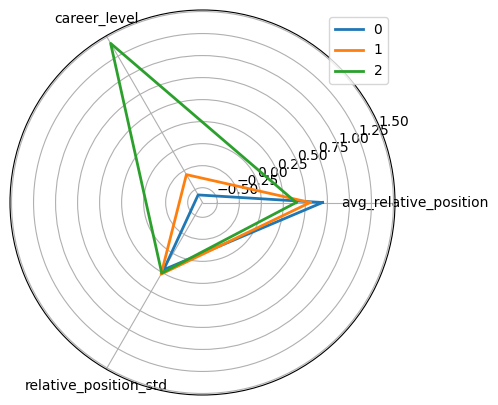

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(cyclists_df.columns)
plt.figure(figsize=(5, 5))

for k in range(0, n_clusters):
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
     
    values = cyclists_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], cyclists_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()

#### Parallel Coordinates Plot for Centroids

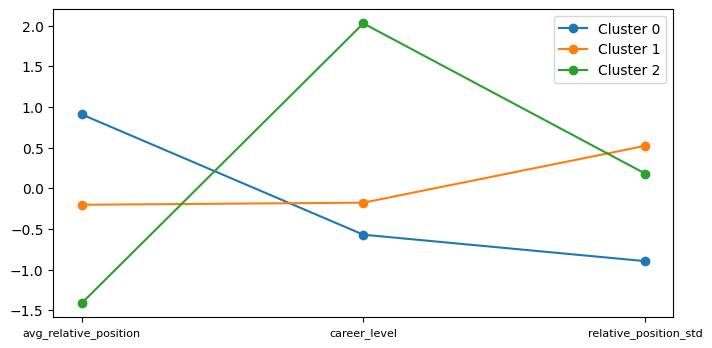

In [19]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8, 4))
centers = best_kmeans.cluster_centers_
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(columns_to_keep)), columns_to_keep, fontsize=8)
plt.legend(fontsize=10)
plt.show()

---

## ```Races``` Dataset

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc
import os
import scipy.stats as stats
import pandas as pd
import plotly.express as px
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

The dataset is used after it has undergone the phases of cleaning, feature engineering, and outlier detection.

In [21]:
races_df = pd.read_csv('../dataset/races_outlier.csv')

### **Clustering Preprocessing - Normalization**

#### **Decision of rcaes features**
Feature decision is made among the numerical-only features 

In [22]:
# columns_preserve = ['startlist_quality', 'avg_cyclists_level', 'race_importance']     SIMONELLI
columns_preserve = ["avg_cyclists_level", "race_importance"] #["climb_total", "length"]
all_races_df = races_df
# Create a new dataset with only the specified columns
races_df = races_df[columns_preserve]

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(races_df)
races_normalized_df = scaler.transform(races_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(races_df)), columns=races_df.columns)



,avg_cyclists_level,race_importance
0,-0.036133,0.498403
1,0.133930,0.311195
2,0.101016,0.387745
3,0.263208,0.419218
4,0.206134,0.371614
...,...,...
2520,0.070864,0.167946
2521,0.083588,0.165084
2522,0.071326,0.159360
2523,0.090377,0.154590


### **K-means** for reaces dataset

### **Best K**

In [24]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(races_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

    print(f'k: {k}, SSE: {sse}')

k: 2, SSE: 67.79167412637909
k: 3, SSE: 38.416461510948736
k: 4, SSE: 25.434225133794207
k: 5, SSE: 20.983996577366703
k: 6, SSE: 17.79946310260855
k: 7, SSE: 15.350866783826008
k: 8, SSE: 13.828380310455353
k: 9, SSE: 12.315863733877315
k: 10, SSE: 10.84426038154303
k: 15, SSE: 7.429940411647485
k: 20, SSE: 5.594523353209311


In [25]:
for k in k_grid:
    print(f'for k = {k}')
    
    print('SSE %s' % dict_kmeans[f'{k}_sse'])
    current_bouldin = metrics.davies_bouldin_score(races_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    
    current_silhouette = silhouette_score(races_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)

for k = 2
SSE 67.79167412637909
Separation 0.7579472161395392
Silhouette 0.5245073456670373
for k = 3
SSE 38.416461510948736
Separation 0.6815529018034038
Silhouette 0.5335146520622192
for k = 4
SSE 25.434225133794207
Separation 0.691696404559969
Silhouette 0.4875629029488085
for k = 5
SSE 20.983996577366703
Separation 0.7847670444935171
Silhouette 0.4599480301674148
for k = 6
SSE 17.79946310260855
Separation 0.81219704554303
Silhouette 0.41477738591196395
for k = 7
SSE 15.350866783826008
Separation 0.89114272499508
Silhouette 0.38159315249214815
for k = 8
SSE 13.828380310455353
Separation 0.863334616674887
Silhouette 0.3811329945843254
for k = 9
SSE 12.315863733877315
Separation 0.9189824407962323
Silhouette 0.3513490202982651
for k = 10
SSE 10.84426038154303
Separation 0.8602775389531908
Silhouette 0.35790213172285446
for k = 15
SSE 7.429940411647485
Separation 0.8574871065113918
Silhouette 0.3565383901405995
for k = 20
SSE 5.594523353209311
Separation 0.8306477781622876
Silhouette 0

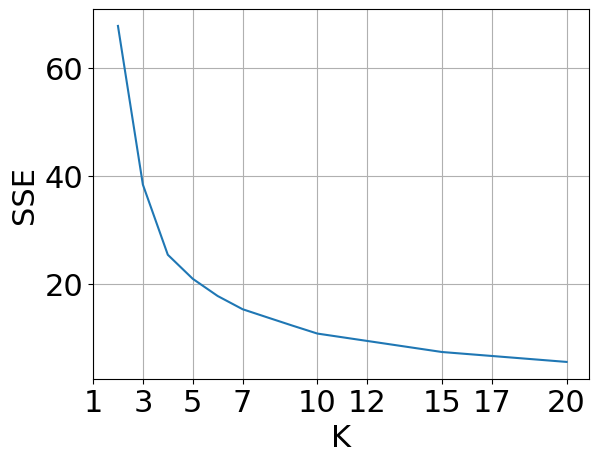

In [26]:
sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()


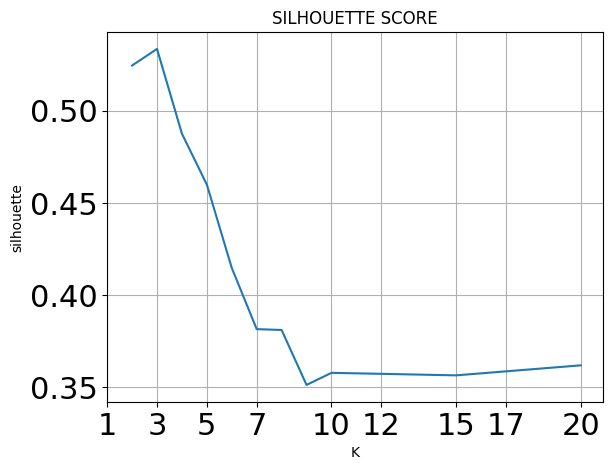

In [27]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

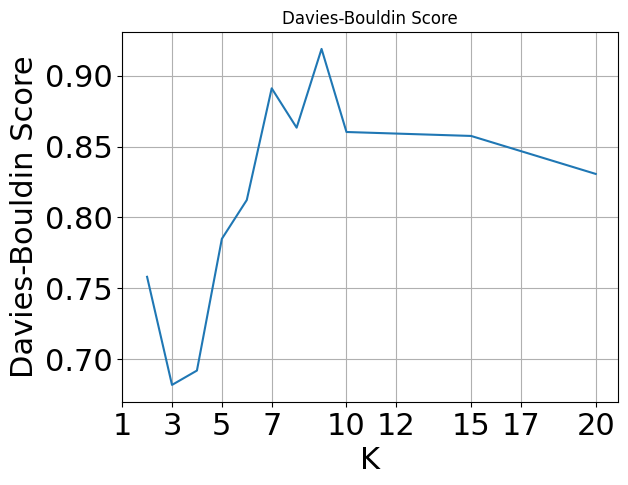

In [28]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

### **K-means resuslts** (races datastet)

In [29]:
#RETRAIN BEST K-MEANS
best_k = 3
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=1000)
best_kmeans.fit(races_normalized_df)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [30]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [713, 261, 1551]


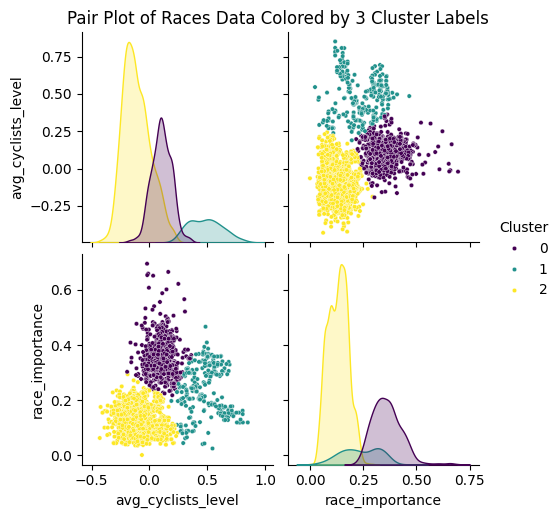

In [31]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

all_races_df = all_races_df.assign(Cluster=labels_series.values)

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(races_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10, 'alpha': 1.0})
plt.suptitle(f'Pair Plot of Races Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()

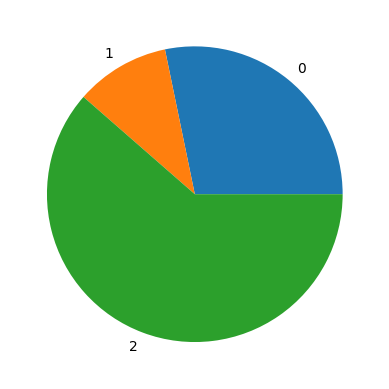

In [32]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

#### Characterization based on ```top_complex_races``` column

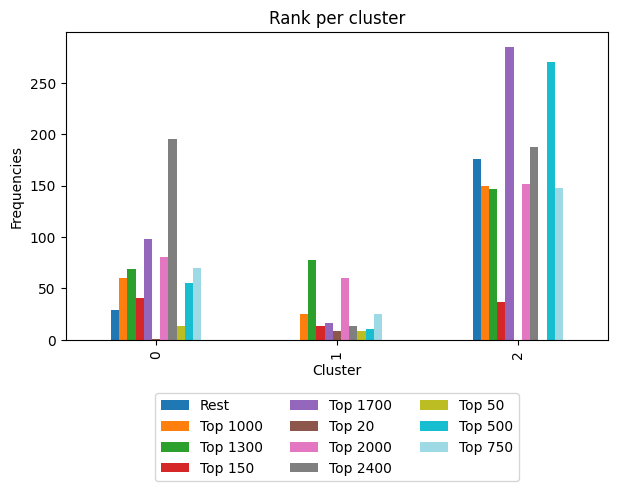

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, all_races_df['top_complex_races_2'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


**More precise visualization**

In [35]:
# Sort the cyclists_df DataFrame by the 'career_level' column in descending order
sorted_races_df = all_races_df.sort_values(by='race_importance', ascending=False)
# [323, 1347, 856] for length and climb total

# Define the bins and labels
bins = [0, occ_list[0],  occ_list[0]+occ_list[1], len(sorted_races_df)]
labels = ['Top'+str(bins[1]), 'Top'+str(bins[2]), 'Rest']

# Create a new column 'career_level_category' based on the bins
sorted_races_df['top_races2'] = pd.cut(range(1, len(sorted_races_df) + 1), bins=bins, labels=labels, right=False)

# Add the 'top_cyclists' column to the original cyclists_df
all_races_df = all_races_df.merge(sorted_races_df[['_url', 'top_races2']], on='_url', how='left')

all_races_df

,_url,name,points,length,climb_total,profile,startlist_quality,is_tarmac,start_date,duration,...,avg_slope,min_duration,duration_to_length,real_name,startlist_entropy,points_entropy,difficulty_index_2,top_complex_races_2,Cluster,top_races2
0,amstel-gold-race/2012/result,Amstel Gold Race,225.0,2.565,3.300,2.0,1251,False,2012-04-15,06:32:35,...,128.6550,6.543056,25.5090,amstel-gold-race,3.459432,-0.000000,0.454133,Top 1300,0,Top713
1,amstel-gold-race/2013/result,Amstel Gold Race,225.0,2.518,3.500,2.0,1149,False,2013-04-14,06:35:21,...,138.9992,6.589167,26.1683,amstel-gold-race,3.459432,-0.000000,0.502886,Top 1300,0,Top713
2,amstel-gold-race/2014/result,Amstel Gold Race,225.0,2.514,3.495,2.0,1140,False,2014-04-20,06:25:57,...,139.0215,6.432500,25.5867,amstel-gold-race,3.459432,-0.000000,0.488218,Top 1300,0,Top713
3,amstel-gold-race/2015/result,Amstel Gold Race,225.0,2.580,3.558,3.0,1175,False,2015-04-19,06:31:49,...,137.9070,6.530278,25.3112,amstel-gold-race,3.459432,-0.000000,0.768701,Top 1000,0,Top713
4,amstel-gold-race/2016/result,Amstel Gold Race,225.0,2.487,3.320,2.0,1120,False,2016-04-17,06:18:03,...,133.4942,6.300833,25.3351,amstel-gold-race,3.459432,-0.000000,0.500786,Top 1300,0,Top713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,vuelta-a-espana/2022/stage-6,La Vuelta ciclista a España,80.0,1.812,4.120,5.0,968,True,2022-08-25,04:38:00,...,227.3731,4.633333,25.5703,vuelta-a-espana,4.510788,0.057459,1.249892,Top 500,2,Rest
2521,vuelta-a-espana/2022/stage-7,La Vuelta ciclista a España,80.0,1.900,3.359,2.0,968,True,2022-08-26,04:30:58,...,176.7895,4.516111,23.7690,vuelta-a-espana,4.510788,0.057459,0.456009,Top 1300,2,Rest
2522,vuelta-a-espana/2022/stage-8,La Vuelta ciclista a España,80.0,1.534,3.741,5.0,968,True,2022-08-27,04:05:25,...,243.8722,4.090278,26.6641,vuelta-a-espana,4.510788,0.057459,1.254049,Top 500,2,Rest
2523,vuelta-a-espana/2022/stage-9,La Vuelta ciclista a España,80.0,1.714,3.675,5.0,968,True,2022-08-28,04:32:39,...,214.4107,4.544167,26.5121,vuelta-a-espana,4.510788,0.057459,1.253890,Top 500,2,Rest


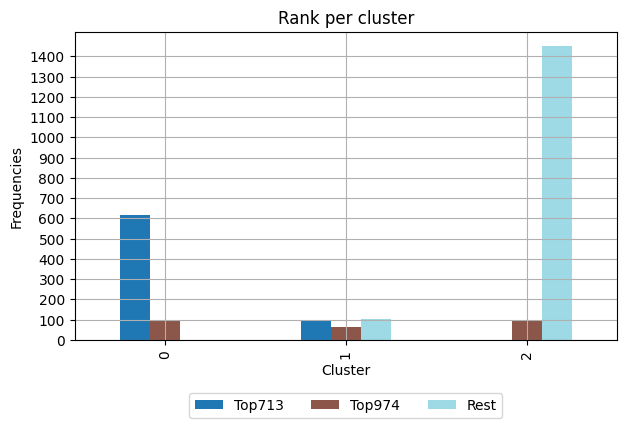

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, all_races_df['top_races2'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Aggiungere più intervalli sull'asse y
ax.set_yticks(range(0, rank_xt_pct.values.max() + 1, 100))

# Aggiungere la griglia
ax.grid(True)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()

## **TO DO** 

#### Radar plot

0
1
2


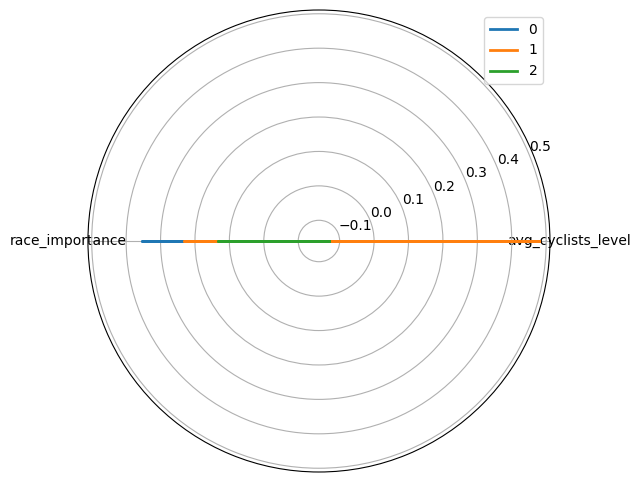

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(races_df.columns)
plt.figure(figsize=(6, 6))

for k in range(0, n_clusters):
    print(k)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    values = races_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], races_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()

#### Parallel Coordinates Plot for Centroids

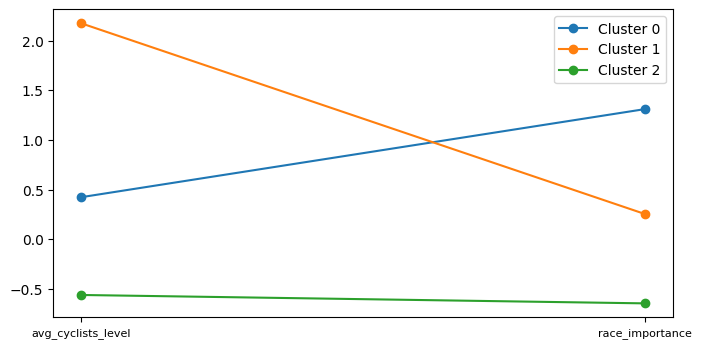

In [38]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8, 4))
centers = best_kmeans.cluster_centers_
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(columns_preserve)), columns_preserve, fontsize=8)
plt.legend(fontsize=10)
plt.show()